In [76]:
#importing dataset and viewing first 10 rows
import pandas as pd
Obesity_dataset = pd.read_csv("C:\\Users\\wendi\\Downloads\\ObesityDataSet_raw_and_data_sinthetic.csv")
Obesity_dataset.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [77]:
Obesity_dataset.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [78]:
Obesity_dataset.isnull().sum() #checking missing values in dataset

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [79]:
# Encoding binary variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
binary_variables = ['Gender','family_history_with_overweight','SCC','FAVC','SMOKE']
for var in binary_variables:
    Obesity_dataset[var]=label_encoder.fit_transform(Obesity_dataset[var])
Obesity_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [80]:
#Encoding multi-class variables
Obesity_dataset = pd.get_dummies(Obesity_dataset, columns = ['CAEC','CALC','MTRANS','NObeyesdad'],drop_first = True)
Obesity_dataset.head

<bound method NDFrame.head of       Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1  

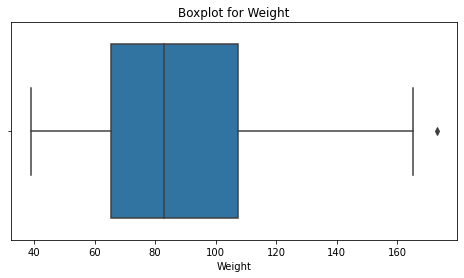

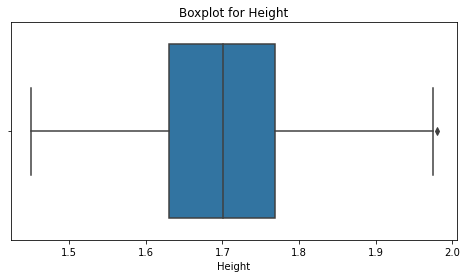

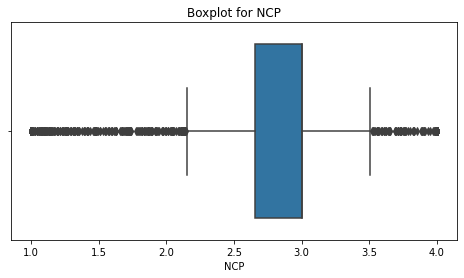

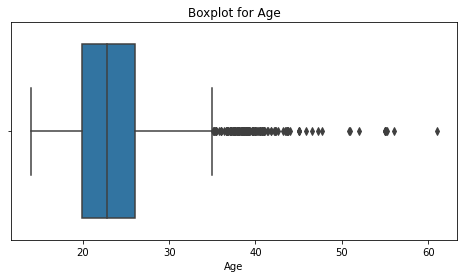

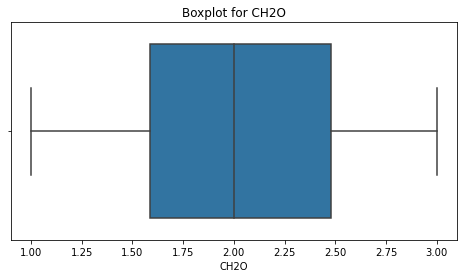

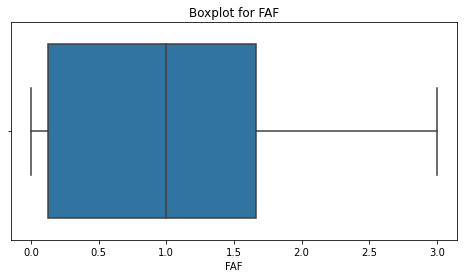

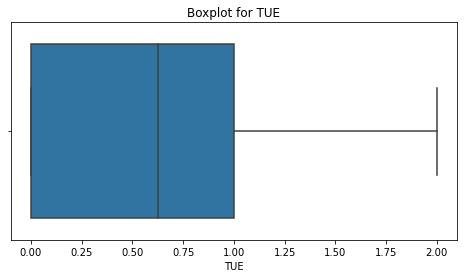

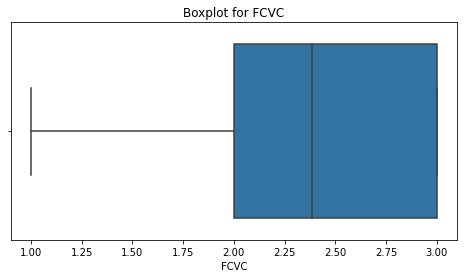

In [81]:
#Outlier detection and handling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

continuous_variables = ['Weight','Height','NCP','Age','CH2O','FAF','TUE','FCVC']
for var in continuous_variables:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=Obesity_dataset[var])
        plt.title(f'Boxplot for {var}')
        plt.show

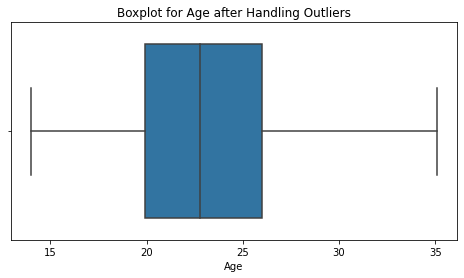

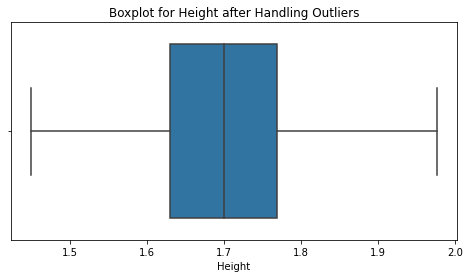

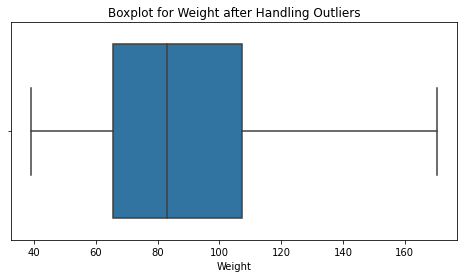

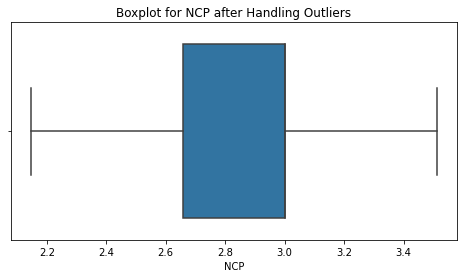

In [82]:
# Capping outliers

Outlier_vars =['Age','Height','Weight','NCP'] 

#Creating function to cap outliiers for all variables
def cap_outliers(df,columns):
    for column in columns:
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1
        lowerbound = Q1-1.5*IQR
        upperbound = Q3+1.5*IQR
        df[column] = df[column].apply(lambda x: lowerbound if x < lowerbound else upperbound if x > upperbound else x)
    return Obesity_dataset
#Applying the function to variables with outliers
Obesity_dataset = cap_outliers(Obesity_dataset,Outlier_vars)

#Re-plot boxplots to validate outlier handling
for var in Outlier_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=Obesity_dataset[var])
    plt.title(f'Boxplot for {var} after Handling Outliers')
    plt.show()

In [83]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Obesity_dataset[continuous_variables] = scaler.fit_transform(Obesity_dataset[continuous_variables])

EDA


In [84]:
#Summary statistics
print(Obesity_dataset.describe())

            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921     0.470145     0.478325     0.362229   
std       0.500083     0.250362     0.177321     0.199344   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.282135     0.342101     0.201522   
50%       1.000000     0.416424     0.476089     0.334940   
75%       1.000000     0.569281     0.605261     0.520913   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     0.709522     0.504510   
std                          0.386247     0.320371     0.266963     0.293688   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.000000     1.000000

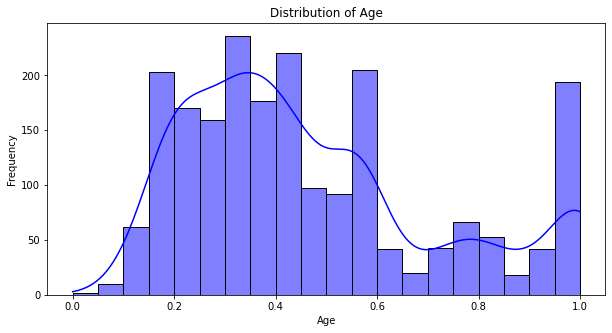

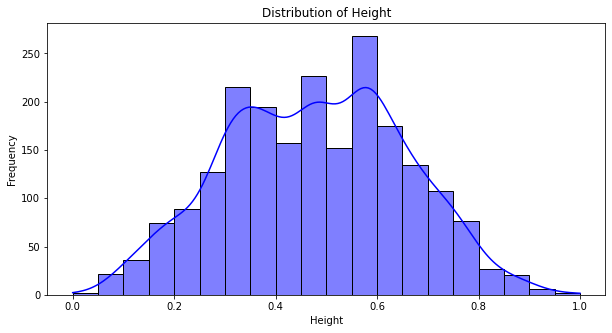

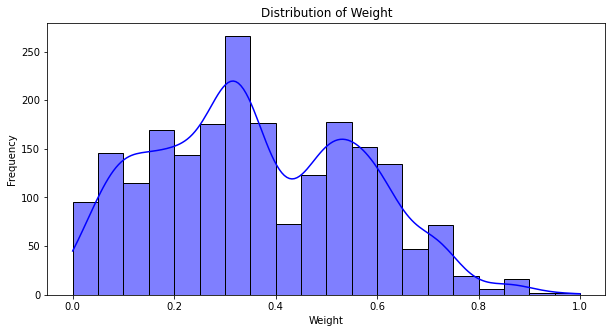

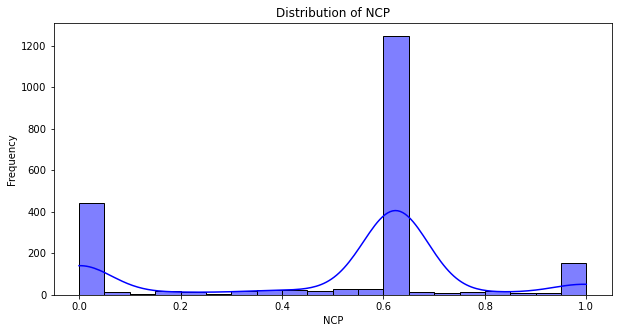

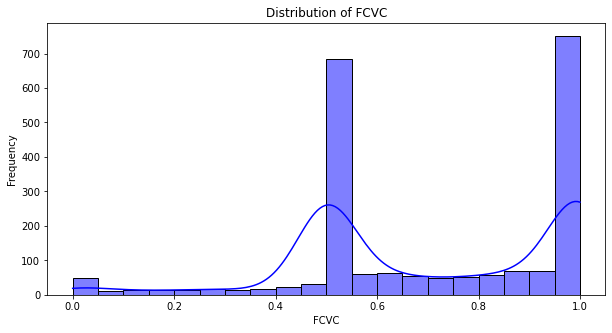

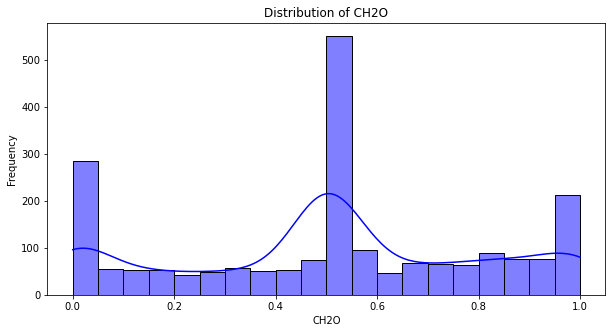

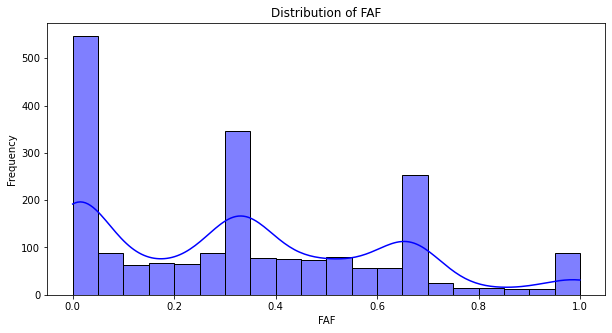

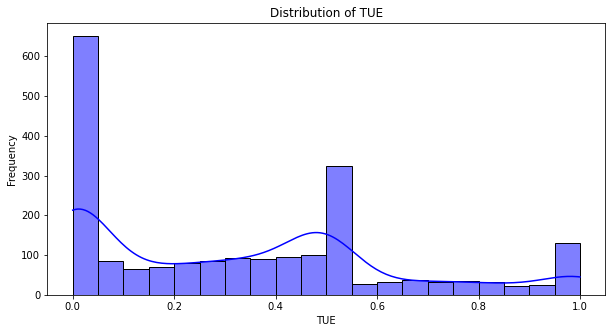

In [85]:
#Distribution analysis
# List of key variables
key_vars = ['Age', 'Height', 'Weight', 'NCP', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Function to plot histograms and KDE for each variable
def plot_distributions(df, variables):
    for var in variables:
        plt.figure(figsize=(10, 5))
        
        # Histogram with KDE
        sns.histplot(df[var], kde=True, bins=20, color='blue')
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.show()
# Plot distributions
plot_distributions(Obesity_dataset, key_vars)

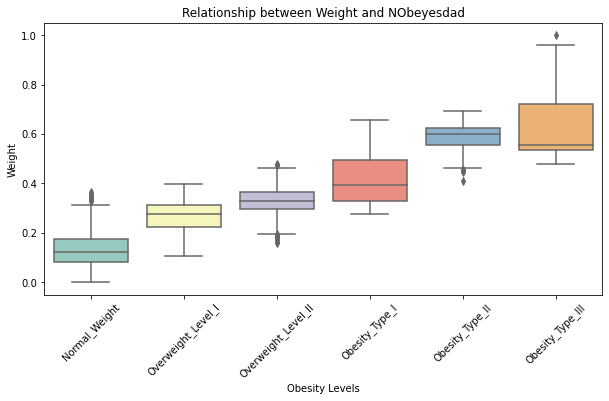

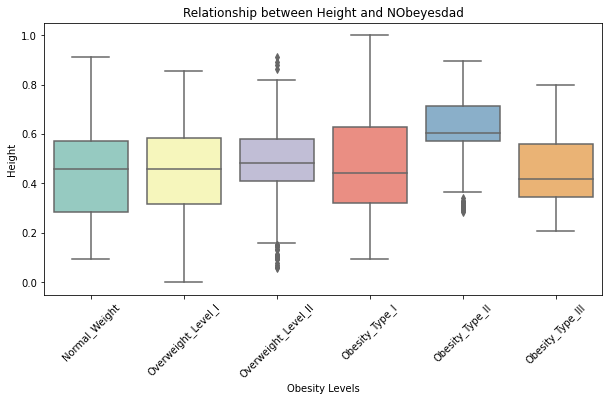

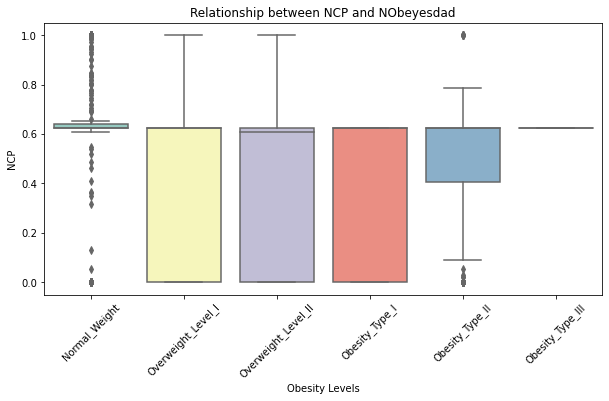

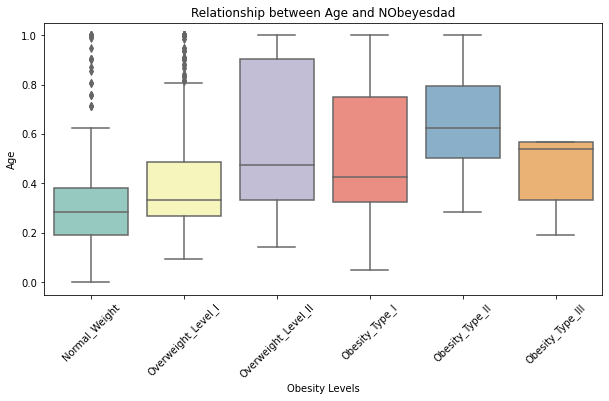

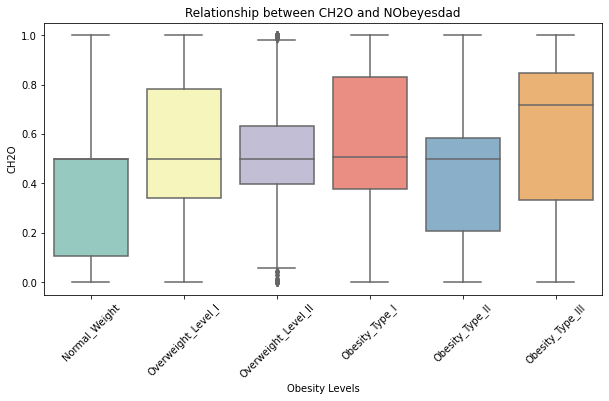

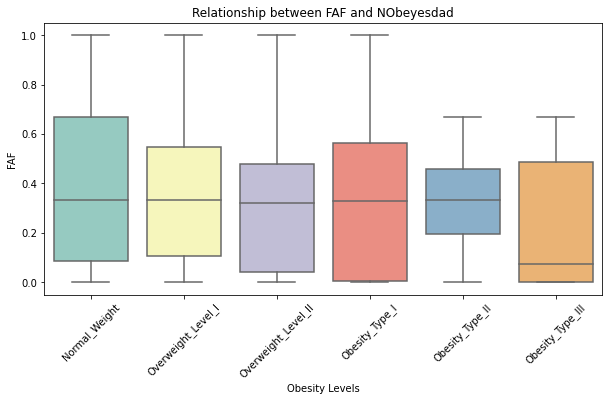

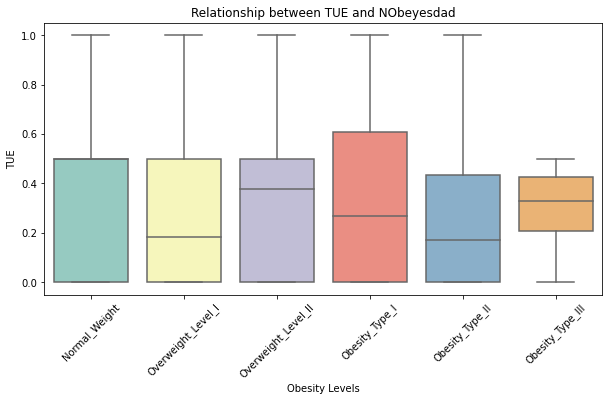

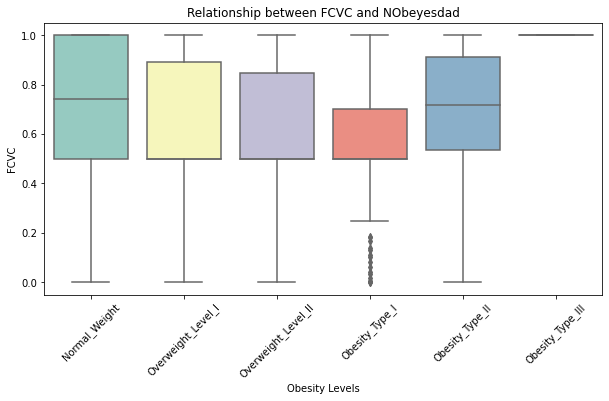

In [86]:
# Reverse one-hot encoding for NObeyesdad
def reverse_one_hot(df, prefix):
    # Extract columns with the prefix
    one_hot_columns = [col for col in df.columns if col.startswith(prefix)]
    # Combine into a single column with the obesity category
    df['NObeyesdad'] = df[one_hot_columns].idxmax(axis=1).str.replace(prefix + '_', '')
    return df

# Apply reverse one-hot encoding (adjust prefix as needed)
Obesity_dataset = reverse_one_hot(Obesity_dataset, 'NObeyesdad')

# Boxplots: Continuous variables vs. NObeyesdad (Obesity Levels)
def plot_boxplots(df, variables, target):
    for var in variables:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target, y=var, data=Obesity_dataset, palette="Set3")
        plt.title(f'Relationship between {var} and {target}')
        plt.xlabel('Obesity Levels')
        plt.ylabel(var)
        plt.xticks(rotation=45)
        plt.show()
plot_boxplots(Obesity_dataset, continuous_variables, 'NObeyesdad')

Correlation Matrix:          Weight    Height       NCP       Age      CH2O       FAF       TUE  \
Weight  1.000000  0.463120  0.054791  0.249975  0.200607 -0.051500 -0.071599   
Height  0.463120  1.000000  0.208636 -0.002326  0.213357  0.294726  0.051904   
NCP     0.054791  0.208636  1.000000 -0.096479  0.058640  0.129371  0.037937   
Age     0.249975 -0.002326 -0.096479  1.000000 -0.041606 -0.158381 -0.294829   
CH2O    0.200607  0.213357  0.058640 -0.041606  1.000000  0.167236  0.011965   
FAF    -0.051500  0.294726  0.129371 -0.158381  0.167236  1.000000  0.058562   
TUE    -0.071599  0.051904  0.037937 -0.294829  0.011965  0.058562  1.000000   
FCVC    0.216106 -0.038108  0.040449  0.030874  0.068461  0.019939 -0.101135   

            FCVC  
Weight  0.216106  
Height -0.038108  
NCP     0.040449  
Age     0.030874  
CH2O    0.068461  
FAF     0.019939  
TUE    -0.101135  
FCVC    1.000000  


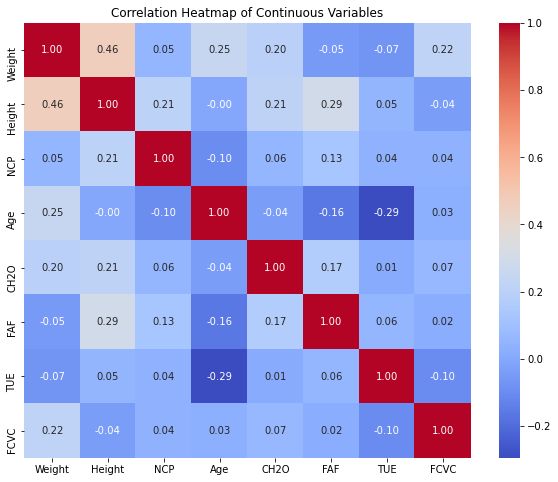

In [87]:
# Calculate the correlation matrix
correlation_matrix = Obesity_dataset[continuous_variables].corr()

# Display the correlation matrix
print(f"Correlation Matrix:{correlation_matrix}")


# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

VISUALIZATIONS AND ML


C:\Users\wendi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\wendi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


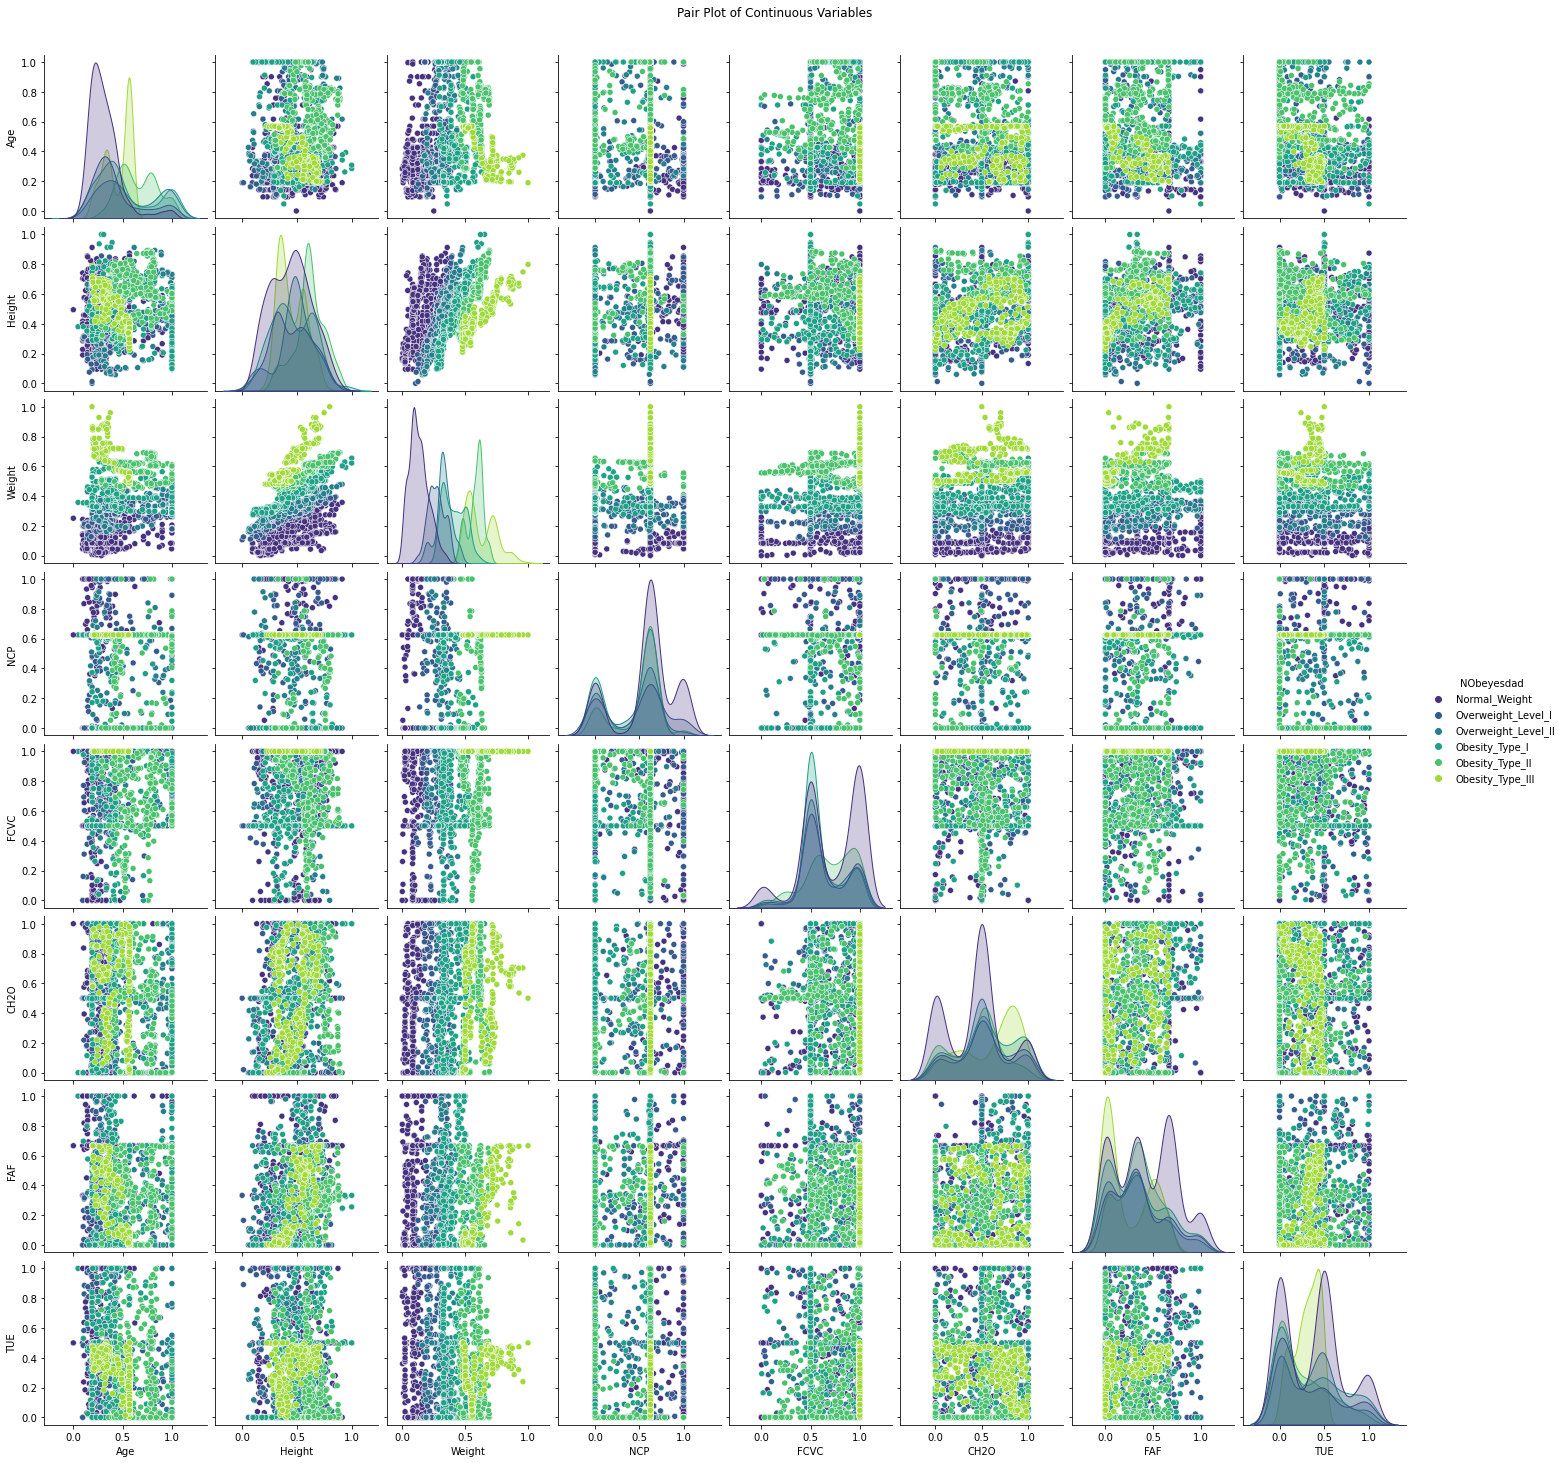

In [88]:
## Pairplots
# Select key continuous variables and target
selected_vars = ['Age', 'Height', 'Weight', 'NCP', 'FCVC', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']

# Create pair plot
sns.pairplot(Obesity_dataset[selected_vars], hue='NObeyesdad', palette='viridis', diag_kind='kde')
plt.suptitle("Pair Plot of Continuous Variables", y=1.02)
plt.show()

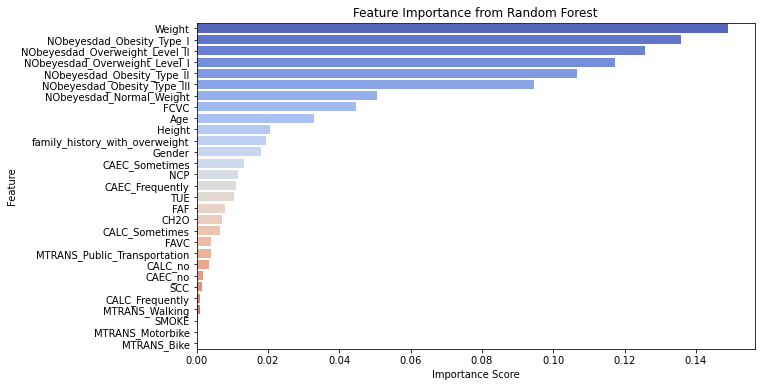

In [89]:
## Feature importance
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = Obesity_dataset.drop(columns=['NObeyesdad'])
y = Obesity_dataset['NObeyesdad']

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


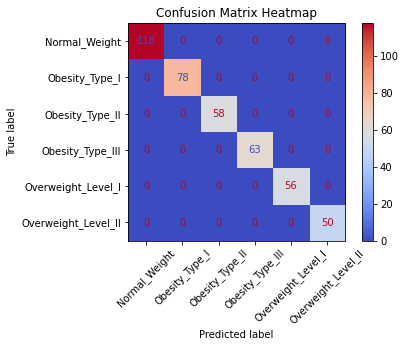

In [90]:
## Confusion matrix heatmap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (using Random Forest as an example)
y_pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Plot confusion matrix heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='coolwarm', xticks_rotation=45)
plt.title("Confusion Matrix Heatmap")
plt.show()


In [91]:
## Feature Engineering
# Reverse necode NObeyesdad to reconstruct a single categorical column
# List of columns that represent one-hot encoding for 'NObeyesdad'
#nobeyesdad_columns = [col for col in Obesity_dataset.columns if col.startswith('NObeyesdad')]

# Reverse one-hot encoding: Select the category with value '1' for each row
#Obesity_dataset['NObeyesdad'] = Obesity_dataset[nobeyesdad_columns].idxmax(axis=1)

# Clean the category names (remove prefix 'NObeyesdad_')
#Obesity_dataset['NObeyesdad'] = Obesity_dataset['NObeyesdad'].str.replace('NObeyesdad_', '')

# Check the first few rows to ensure it worked correctly
#print(Obesity_dataset[['NObeyesdad']].head())

In [92]:
# Training and Testing
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = Obesity_dataset.drop(columns=['NObeyesdad'])  # Drop target variable
y = Obesity_dataset['NObeyesdad']  # Target variable

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1688, 29)
Test set shape: (423, 29)


In [93]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Create DataFrame to show actual vs predicted values
predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted (Logistic Regression)': y_pred_log_reg,
})

print(predictions)

                   Actual Predicted (Logistic Regression)
544         Normal_Weight                   Normal_Weight
1987     Obesity_Type_III                Obesity_Type_III
420         Normal_Weight                   Normal_Weight
527         Normal_Weight                   Normal_Weight
196         Normal_Weight                   Normal_Weight
...                   ...                             ...
447    Overweight_Level_I              Overweight_Level_I
1793      Obesity_Type_II                 Obesity_Type_II
73          Normal_Weight                   Normal_Weight
1711      Obesity_Type_II                 Obesity_Type_II
1103  Overweight_Level_II             Overweight_Level_II

[423 rows x 2 columns]


In [94]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Create DataFrame to show actual vs predicted values
predictions1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted (Random Forest)': y_pred_log_reg,
})
print(predictions1)

                   Actual Predicted (Random Forest)
544         Normal_Weight             Normal_Weight
1987     Obesity_Type_III          Obesity_Type_III
420         Normal_Weight             Normal_Weight
527         Normal_Weight             Normal_Weight
196         Normal_Weight             Normal_Weight
...                   ...                       ...
447    Overweight_Level_I        Overweight_Level_I
1793      Obesity_Type_II           Obesity_Type_II
73          Normal_Weight             Normal_Weight
1711      Obesity_Type_II           Obesity_Type_II
1103  Overweight_Level_II       Overweight_Level_II

[423 rows x 2 columns]


In [95]:
# Evaluate the model's performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Accuracy: 1.0
                     precision    recall  f1-score   support

      Normal_Weight       1.00      1.00      1.00       118
     Obesity_Type_I       1.00      1.00      1.00        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      1.00      1.00        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           1.00       423
          macro avg       1.00      1.00      1.00       423
       weighted avg       1.00      1.00      1.00       423



In [96]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
                     precision    recall  f1-score   support

      Normal_Weight       1.00      1.00      1.00       118
     Obesity_Type_I       1.00      1.00      1.00        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      1.00      1.00        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           1.00       423
          macro avg       1.00      1.00      1.00       423
       weighted avg       1.00      1.00      1.00       423

